# Mobile Phone Prediction

<a id='intro'></a>

## Introduction and Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

+ 0: Low Cost
+ 1: Medium Cost
+ 2: High Cost
+ 3: Very High Cost

For this project, the f1score is used as the classification metric for evaluation. To interprete the f1score, the general rule of thumb to follow is: 

- 0.9 - 1.0 : Very Good
- 0.8 - 0.9 : Good
- 0.5 - 0.8 : OK
- Below 0.5 : Not Good

## Table of Contents

<ul>
<li><a href="#intro">Introduction & Context</a></li>
<li><a href="#import">Importing Libraries and Data</a></li>    
<li><a href="#explore">Data Exploration</a></li>
<li><a href="#preprocess">Data Preprocessing</a></li>
<li><a href="#model">Modelling & Evaluation</a></li>
<li><a href="#deploy">Model Deployment</a></li>
    
</ul>

<a id='import'></a>

## Importing Libraries & Data

In [26]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

<a id='explore'></a>

## Data Exploration

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df_test.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
print ("There are {} rows in the train dataset and {} rows in the test dataset".format(
    df.shape[0],df_test.shape[0]))

There are 2000 rows in the train dataset and 1000 rows in the test dataset


<a id='preprocess'></a>

## Data Preprocessing

In [12]:
X = df.drop(['price_range'],1)
y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

<a id='model'></a>

## Modelling & Evaluation

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

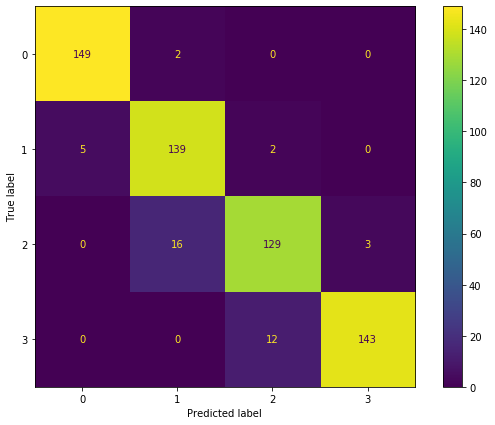

In [14]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(knn, X_test, y_test,ax=ax)
plt.show()


In [15]:
score = f1_score(y_test,y_pred, average = 'weighted')
model = 'KNightborsClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for KNightborsClassifier is 0.93


In [16]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

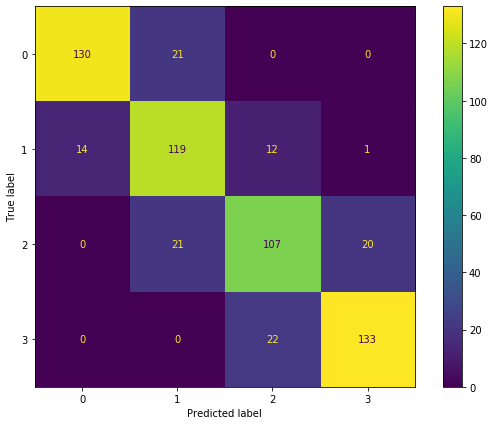

In [17]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(tree, X_test, y_test,ax=ax)
plt.show()


In [18]:
score = f1_score(y_test,y_pred2, average = 'weighted')
model = 'DecisionTreeClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for DecisionTreeClassifier is 0.82


In [19]:
ensemble = RandomForestClassifier()
ensemble.fit(X_train,y_train)
y_pred3 = ensemble.predict(X_test)

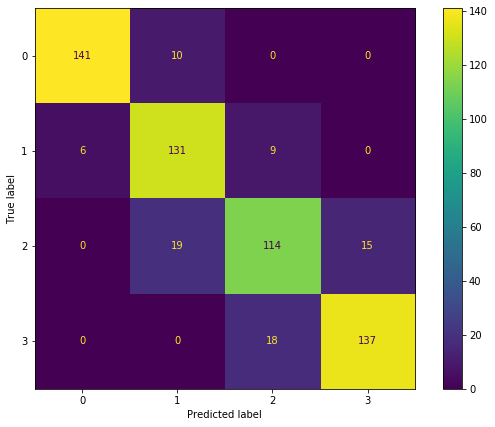

In [20]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(ensemble, X_test, y_test,ax=ax)
plt.show()

In [21]:
score = f1_score(y_test,y_pred3, average = 'weighted')
model = 'RandomForestClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for RandomForestClassifier is 0.87


**After several iterations, the KNearestNeighbors is the best model with f1_score of 0.93**

In [22]:
X_test = df_test.drop(['id'],1)
price_range_test = knn.predict(X_test)

In [23]:
prediction = pd.DataFrame(price_range_test,index=df_test.id, columns = ['price_range'])
prediction.to_csv("Price_Range_Test.csv")

<a id='deploy'></a>

## Model Deployment 

In [27]:
pickle.dump(knn, open('model.pkl', 'wb'))

The application is deployed to Streamlit here: [Streamlit](https://awojidetola-mobile-phone-price-prediction-prediction-mma8kw.streamlitapp.com/)